Cross-country solar radiation comparison

# Importing the depndencies 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loading the cleaned datasets for each country

In [ ]:
## SAFE DATA LOADING
print("Loading data safely with sampling...")

# Load only 45,000 rows from each country to guarantee no crashes
benin_data = pd.read_csv('../data/benin_clean.csv', nrows=45000)
sierra_leone_data = pd.read_csv('../data/sierraleone_clean.csv', nrows=45000)
togo_data = pd.read_csv('../data/togo_clean.csv', nrows=45000)

print(f"Loaded: Benin({len(benin_data)}), Sierra Leone({len(sierra_leone_data)}), Togo({len(togo_data)})")

benin_data['country'] = 'Benin'
sierra_leone_data['country'] = 'Sierra Leone'
togo_data['country'] = 'Togo'

all_countries = pd.concat([benin_data, sierra_leone_data, togo_data], ignore_index=True)
print(f"Total data: {len(all_countries)} rows - SAFE SIZE")

Loading data safely with sampling...
Loaded: Benin(45000), Sierra Leone(45000), Togo(45000)
Total data: 135000 rows - SAFE SIZE


# Combining the data for analysis 
This is an important section. With out this section we need to write benin_ghi_mean = benin_data['GHI'].mean() for all the 3 countries and then repeat them for boxplots, correlations and other operations. So, I just used this block of section for simplicity.

In [21]:
## Combine Data for Comparison otherwise 
print("Combinig all the data for the analysis")


all_countries = pd.concat([benin_data, sierra_leone_data, togo_data], ignore_index=True)
print(f"Combined data shape: {all_countries.shape}")

solar_metrics = ['GHI', 'DNI', 'DHI']
available_metrics = [metric for metric in solar_metrics 
                     if metric in all_countries.columns]
print(f"Available solar metrics: {available_metrics}")

Combinig all the data for the analysis
Combined data shape: (135000, 27)
Available solar metrics: ['GHI', 'DNI', 'DHI']


# Metric comparison
- In this section, I will compare the solar radiation measurements between Benin, Sierra Leone, and Togo. I want to see which country gets the most sunlight and how consistent the solar energy is in each location.

- The Metrics We're Comparing:
GHI (Global Horizontal Irradiance): Total sunlight falling on a flat surface
DNI (Direct Normal Irradiance): Direct sunlight coming straight from the sun
DHI (Diffuse Horizontal Irradiance): Scattered sunlight from the sky

- First, I created boxplots for each solar measurement (GHI, DNI, DHI) to visually compare the three countries. The boxplots shows:
The middle value (median) of solar radiation in each country
The range of values (how much the sunlight varies)
Any unusual high or low values that might be outliers

- Then, I made a summary table with exact numbers to complement the boxplots. The table gives us:
Mean: The average solar radiation value
Median: The middle value where half the measurements are above and half below
Standard Deviation: How spread out the values are (higher numbers mean more variation)
- Summary table might be confusing at first since each country is represented three times. The table is not just summarizing data by country, but by a combination of country and solar metric.

Creating boxplots to compare countries...


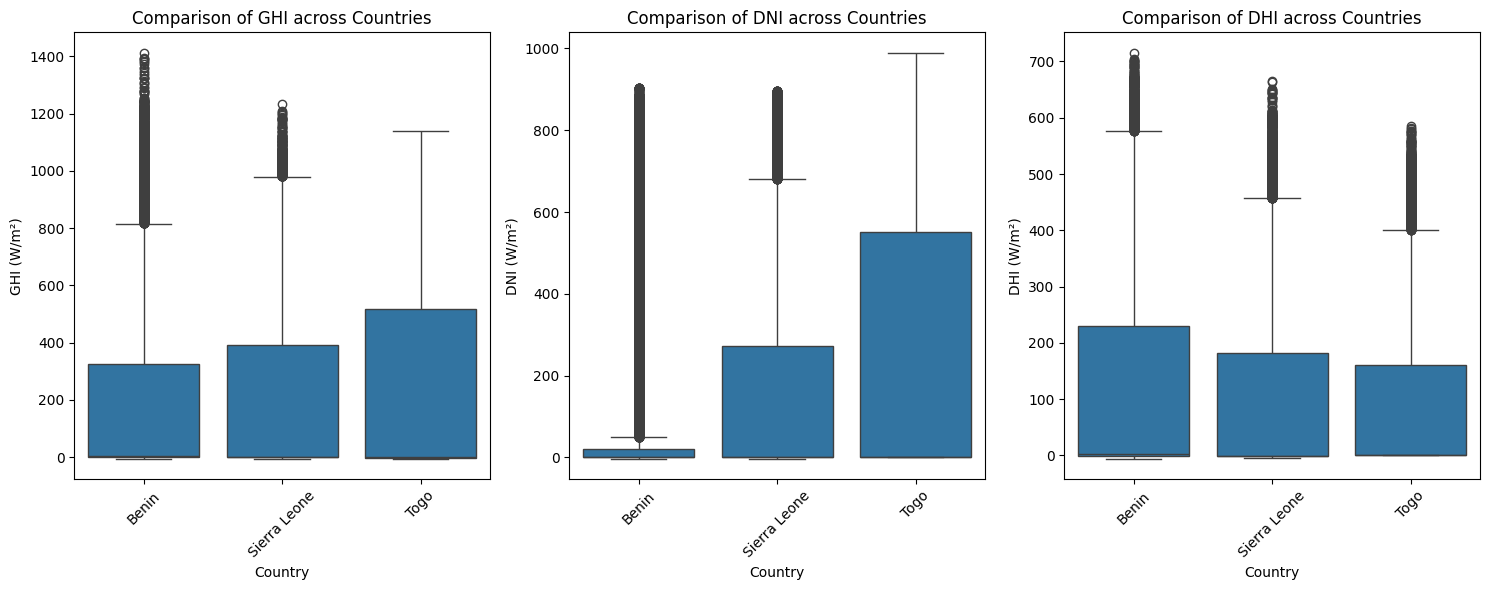

Boxplots created! Now we can see how each country compares.


In [22]:
print("Creating boxplots to compare countries...")

# Make boxplots for each solar measurement
fig, axes = plt.subplots(1, len(available_metrics), figsize=(15, 6))

if len(available_metrics) == 1:
    axes = [axes]

for i, metric in enumerate(available_metrics):
    
    sns.boxplot(data=all_countries, x='country', y=metric, ax=axes[i])
    
    
    axes[i].set_title(f'Comparison of {metric} across Countries')
    axes[i].set_xlabel('Country')
    axes[i].set_ylabel(f'{metric} (W/m²)')
    axes[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

print("Boxplots created! Now we can see how each country compares.")

In [23]:
print("Creating summary table of statistics...")


summary_data = []

countries_list = ['Benin', 'Sierra Leone', 'Togo']


for country_name in countries_list:

    country_data = all_countries[all_countries['country'] == country_name]
    
    
    for metric in available_metrics:
        if metric in country_data.columns:
            # Calculate the mean, median, and standard deviation
            mean_value = country_data[metric].mean()
            median_value = country_data[metric].median()
            std_value = country_data[metric].std()
            
            
            summary_data.append({
                'Country': country_name,
                'Metric': metric,
                'Mean': mean_value,
                'Median': median_value,
                'Std_Dev': std_value
            })

summary_df = pd.DataFrame(summary_data)

print("Summary Statistics Table:")
print("This shows the average, middle value, and variation for each solar measurement:")
print(summary_df.to_string(index=False))
print("\nNow we can compare the statistics across all three countries!")

Creating summary table of statistics...
Summary Statistics Table:
This shows the average, middle value, and variation for each solar measurement:
     Country Metric       Mean  Median    Std_Dev
       Benin    GHI 199.711882     2.8 301.064108
       Benin    DNI  96.763118    -0.1 213.589664
       Benin    DHI 122.247633     2.9 169.989978
Sierra Leone    GHI 217.157669    -0.3 315.158170
Sierra Leone    DNI 169.126518    -0.1 281.708810
Sierra Leone    DHI  97.073976    -0.3 134.328490
        Togo    GHI 243.310389    -1.1 332.323655
        Togo    DNI 235.199533     0.0 315.429219
        Togo    DHI  83.742971     0.0 110.313647

Now we can compare the statistics across all three countries!


# Statistical testing
- What I'm Doing Here:
I am going to use a One-way ANOVA test to check if the average solar radiation (GHI) differences between countries are statistically significant, or if they could just be random variations.

- Why I Used One-way ANOVA:
     - It compares the average GHI values across all three countries at once and tells us if the differences we see in the boxplots are meaningful
     - Helps us be confident that one country truly has better solar potential than others

- What the P-value Means:
P-value < 0.05: The differences between countries are statistically significant - meaning the solar potential really is different
P-value ≥ 0.05: The differences could be due to random chance - the countries might have similar solar potential

In [ ]:
print("Runung statistical test using Anova to check if country differences are significant")

# First let me check the GHI data for all the countries
if 'GHI' in all_countries.columns:
    benin_ghi = all_countries[all_countries['country'] == 'Benin']['GHI']
    sierra_ghi = all_countries[all_countries['country'] == 'Sierra Leone']['GHI']
    togo_ghi = all_countries[all_countries['country'] == 'Togo']['GHI']
    
    benin_ghi = benin_ghi.dropna()
    sierra_ghi = sierra_ghi.dropna()
    togo_ghi = togo_ghi.dropna()
    
    print(f"Benin GHI samples: {len(benin_ghi)}")
    print(f"Sierra Leone GHI samples: {len(sierra_ghi)}")
    print(f"Togo GHI samples: {len(togo_ghi)}")
    
    # Run the One-way ANOVA test
    if len(benin_ghi) > 0 and len(sierra_ghi) > 0 and len(togo_ghi) > 0:
        f_statistic, p_value = stats.f_oneway(benin_ghi, sierra_ghi, togo_ghi)
        
        print("\n📊 ONE-WAY ANOVA RESULTS:")
        print(f"F-statistic: {f_statistic:.4f}")
        print(f"P-value: {p_value:.4f}")
        
        # Explain what the results mean
        if p_value < 0.05:
            print(" The differences between countries are STATISTICALLY SIGNIFICANT")
            print(" This means the solar potential differences are real and not just random")
        else:
            print(" The differences between countries are NOT statistically significant")
            print("   The solar potential might be similar across countries")
    else:
        print("Not enough GHI data to run the statistical test")
else:
    print("GHI data not available for statistical testing")

Runung statistical test using Anova to check if country differences are significant
Benin GHI samples: 45000
Sierra Leone GHI samples: 45000
Togo GHI samples: 45000

📊 ONE-WAY ANOVA RESULTS:
F-statistic: 216.3954
P-value: 0.0000
 The differences between countries are STATISTICALLY SIGNIFICANT
 This means the solar potential differences are real and not just random


# Key Observations
- Togo demonstrates the strongest solar potential, with the highest average (mean) for both total (GHI) and direct (DNI) solar radiation.

- All countries show extreme data skew, where near-zero median values contrast sharply with high means, indicating frequent low-sunlight periods punctuated by intense, peak sun.

- Solar resources are highly variable and unpredictable, as shown by standard deviations that rival or exceed the mean values across nearly all metrics and countries.

# Visual summary

COUNTRY RANKING CHART


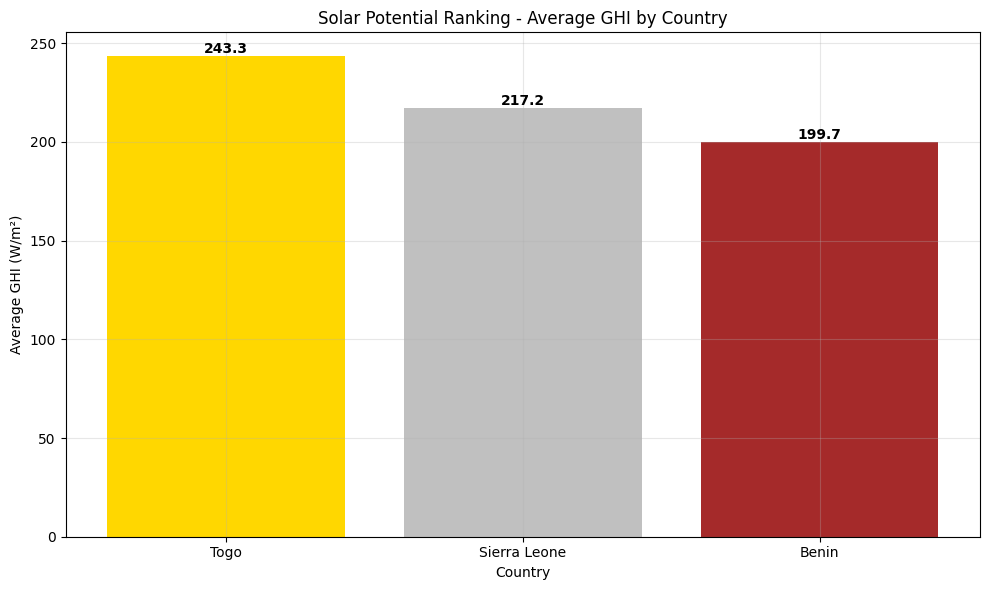

Country Ranking by Average GHI:
1. Togo: 243.3 W/m²
2. Sierra Leone: 217.2 W/m²
3. Benin: 199.7 W/m²


In [ ]:
## Bonus: Visual Summary - Ranking Chart
print("COUNTRY RANKING CHART")

if 'GHI' in all_countries.columns:
    
    avg_ghi = all_countries.groupby('country')['GHI'].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(avg_ghi.index, avg_ghi.values, color=['gold', 'silver', 'brown'])
    plt.title('Solar Potential Ranking - Average GHI by Country')
    plt.xlabel('Country')
    plt.ylabel('Average GHI (W/m²)')
    plt.grid(True, alpha=0.3)
    
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("Country Ranking by Average GHI:")
    for i, (country, value) in enumerate(avg_ghi.items(), 1):
        print(f"{i}. {country}: {value:.1f} W/m²")
else:
    print("GHI data not available for ranking chart")